In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 10

In [2]:
from patsy import dmatrices

import statsmodels.api as sm
from scipy import stats

In [3]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [4]:
boston = load_boston()

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [7]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = pd.Series(boston.target) 

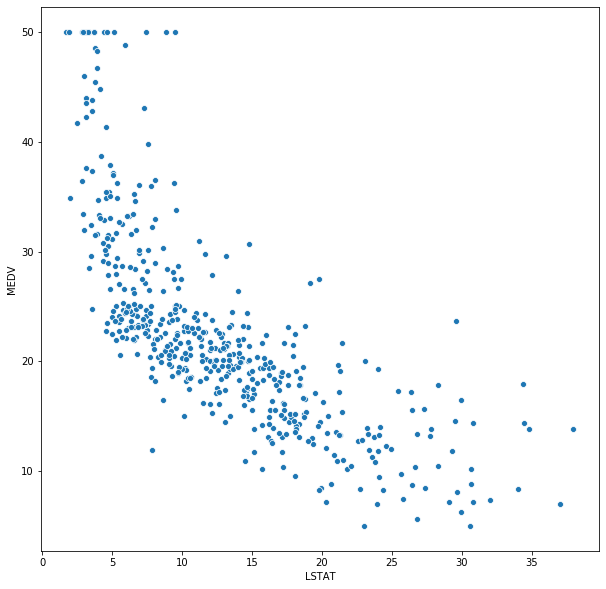

In [8]:
ax = sns.scatterplot(x='LSTAT', y='MEDV', data=df)

In [9]:
fit1 = LinearRegression().fit(X=df["LSTAT"].values.reshape(-1,1), 
                              y=df["MEDV"].values.reshape(-1, 1))

In [10]:
fit1.coef_

array([[-0.95004935]])

In [11]:
fit1.intercept_

array([34.55384088])

In [12]:
y, X = dmatrices('MEDV ~ LSTAT', data=df, return_type='dataframe')

In [13]:
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 24 Mar 2020   Prob (F-statistic):           5.08e-88
Time:                        19:34:57   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [14]:
res.resid.describe()

count    5.060000e+02
mean     3.521821e-14
std      6.209603e+00
min     -1.516745e+01
25%     -3.989612e+00
50%     -1.318186e+00
75%      2.033701e+00
max      2.450013e+01
dtype: float64

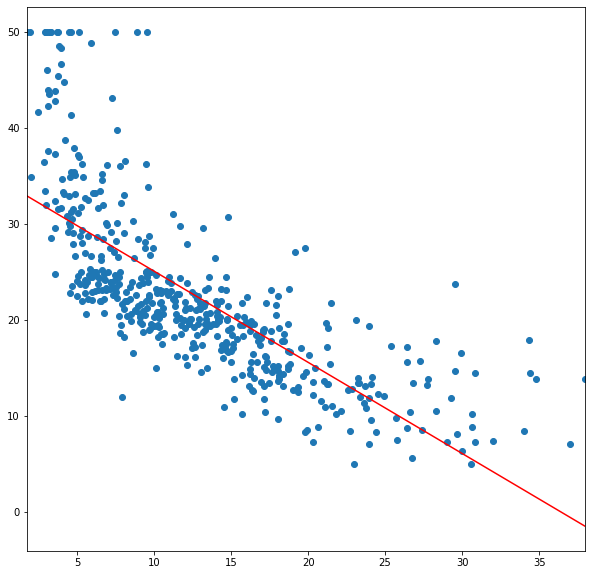

In [18]:
fig = sm.graphics.abline_plot(model_results=res, color='r')
ax = fig.axes[0]
# ax = sns.scatterplot(x='LSTAT', y='MEDV', data=df)
ax.scatter(X["LSTAT"], y)
ax.margins(.1)
plt.show()

2.5% and 97.5%

In [19]:
print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874


In [34]:
X_pred = pd.DataFrame({"LSTAT": [5,10,15]})
X_pred = sm.add_constant(X_pred)

In [36]:
res.predict(X_pred)

0    29.803594
1    25.053347
2    20.303101
dtype: float64

In [40]:
predictions = res.get_prediction(X_pred)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


## Multiple linear regression